In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import random
import matplotlib.pyplot as plt
import sys
import os
import fit_library_n

%matplotlib nbagg
%load_ext autoreload
%autoreload 2


In [2]:
# FITTING PROCEDURE
def fit_FBK_gain(data,voltage,n,gain_array,gainerr_array,bounds,param,volts,spe_array,spe_res,GAIN=2700):
    x = (data[voltage][:,0]-np.min(data[voltage][:,0]))*1E9
    y = (data[voltage][:,1])/np.max(data[voltage][:,1])
    fit = fit_library_n.gaussn_least(x,y,n)
    out_param,perr = fit(bounds,*param)
    plt.figure()
    plt.plot(x,y)
    plt.plot(x,fit.evaluate())
    print out_param
    print perr

    T_int = 400E-9
    #GAIN  = 961
    pV = (out_param[1]/1E9) / T_int; pV_err = (perr[1]/1E9) / T_int
    I_i = pV / GAIN;                 I_i_err = pV_err / GAIN
    Q_i = I_i * T_int;               Q_i_err = I_i_err * T_int
    GAIN_SiPM = Q_i / 1.602E-19;     GAIN_SiPM_err = Q_i_err / 1.602E-19
    print("SiPM GAIN = %e +- %e for VDC = %f" % (np.abs(GAIN_SiPM),np.abs(GAIN_SiPM_err),volts[voltage]))
    gain_array[voltage]=GAIN_SiPM
    spe_array[voltage]=Q_i/1E-12
    spe_res[voltage]=((out_param[2+n+1]/1E9)/GAIN)/1E-12
    gainerr_array[voltage] = GAIN_SiPM_err
    
    #return GAIN


# TEMP -100

In [3]:
#data=np.array([]).reshape(201,0)
data_100=[]
filenames=['F2FBK91900011.dat','F2FBK91900012.dat',
           'F2FBK91900013.dat','F2FBK91900015.dat',
           'F2FBK91900016.dat']
voltages_array_100 = np.array([32.00,33.00,
                               34.00,35.00,
                               36.00])
gain_array_100 = np.zeros(5)
gainerr_array_100 = np.zeros(5)
spe_array_100 = np.zeros(np.shape(voltages_array_100)[0])
speres_array_100 = np.zeros(np.shape(voltages_array_100)[0])

for i in filenames:
    print i
    with open('/home/viherbos/DAQ_DATA/FBK_measures/ROUND2/GAIN_100/'+i,'rb') as oscfile:
        #np.hstack([data,np.array((pd.read_csv(oscfile,delim_whitespace=True,header=None)))])   
        data_100.append(np.array((pd.read_csv(oscfile,delim_whitespace=True,header=None))))   

F2FBK91900011.dat
F2FBK91900012.dat
F2FBK91900013.dat
F2FBK91900015.dat
F2FBK91900016.dat


`ftol` termination condition is satisfied.
Function evaluations 14, initial cost 7.7716e+01, final cost 6.0447e+00, first-order optimality 3.07e-04.


<IPython.core.display.Javascript object>


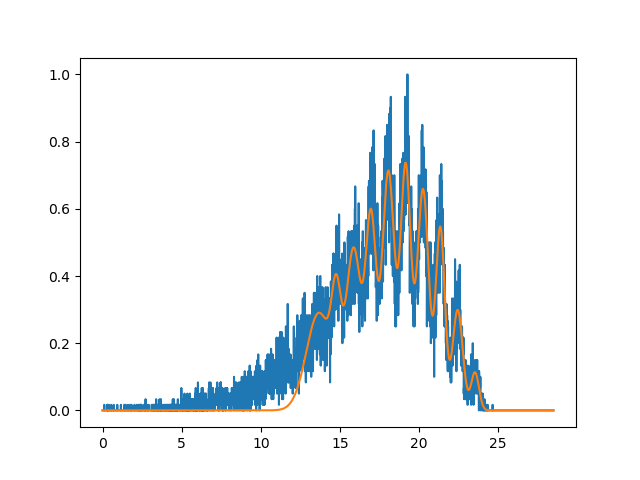

[ 23.5398472   -1.09503164   0.11284638   0.29867833   0.54005938
   0.65661894   0.71984095   0.70959236   0.55763473   0.47618851
   0.26111617   0.29050005   0.24963965   0.32216707   0.28480617
   0.35909787   0.32379182   0.37992298   0.32870102   0.46837733
   0.29655536   0.79999999]
[ 0.01018863  0.0025      0.01204175  0.010852    0.01130362  0.01029573
  0.01084678  0.00998461  0.01279198  0.00956013  0.0143148   0.00725367
  0.0337645   0.01699154  0.00945284  0.0100459   0.00847893  0.01043908
  0.01060796  0.01845209  0.01789787  0.02958935]
SiPM GAIN = 2.531631e+06 +- 5.779819e+03 for VDC = 32.000000


In [11]:
param_3200_100  = [23, -1, 0.60,0.90,0.9,0.9,0.60,0.90,0.9,0.9,0.60,0.90, 0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10]
# [First mu, D_mu, A0,A1,A2,A3, sigma0,sigma1,sigma2,sigma3]
bounds_3200_100 =([22, -3, 0,0,0,0,0,0,0,0,0,0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                  [25, -0.5, 1.0,1,1,1,1,1,1,1,1,1, 0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8])

fit_FBK_gain(data_100,0,10,gain_array_100, gainerr_array_100, bounds_3200_100, param_3200_100, voltages_array_100,spe_array_100,speres_array_100)

`ftol` termination condition is satisfied.
Function evaluations 14, initial cost 7.7684e+01, final cost 5.3583e+00, first-order optimality 7.18e-04.


<IPython.core.display.Javascript object>


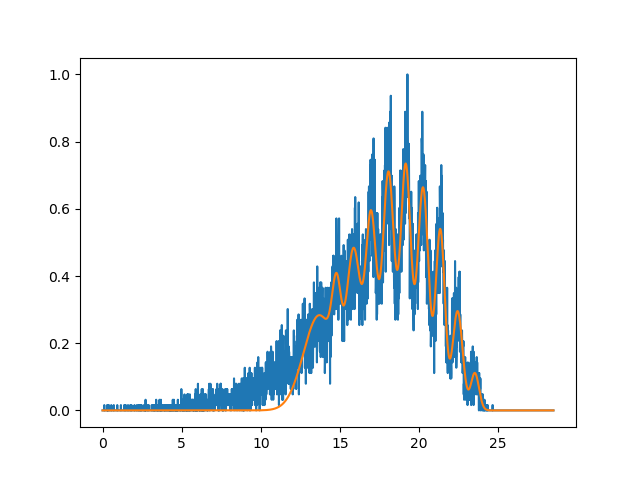

[ 23.5321119   -1.09204097   0.1107323    0.29519518   0.53420516
   0.66088034   0.72022607   0.70531724   0.56178292   0.45444939
   0.22958349   0.28339435   0.25926603   0.31951136   0.29091347
   0.35081823   0.32715691   0.37122401   0.34110026   0.44802563
   0.27992987   0.99999999]
[ 0.00975416  0.00238721  0.01113284  0.01024443  0.01054157  0.0097751
  0.01009275  0.0094866   0.01132903  0.00975804  0.01248581  0.00626724
  0.03338123  0.01633541  0.00922252  0.00926766  0.00811745  0.00963668
  0.01016033  0.0168215   0.01856642  0.03127529]
SiPM GAIN = 2.524717e+06 +- 5.519042e+03 for VDC = 33.000000


In [13]:
param_3300_100  = [23, -1.0, 0.60,0.90,0.9,0.9,0.90,0.90,0.9,0.9,0.90,0.90, 0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10]
# [First mu, D_mu, A0,A1,A2,A3, sigma0,sigma1,sigma2,sigma3]
bounds_3300_100 =([20, -3,   0.0,0,0,0,0,0,0,0,0,0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                  [25, -0.5, 1.0,1,1,1,1,1,1,1,1,1, 0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,1.0])


fit_FBK_gain(data_100,1,10,gain_array_100, gainerr_array_100, bounds_3300_100, param_3300_100, voltages_array_100,spe_array_100,speres_array_100)

`ftol` termination condition is satisfied.
Function evaluations 23, initial cost 8.9806e+01, final cost 7.1331e+00, first-order optimality 2.37e-03.


<IPython.core.display.Javascript object>


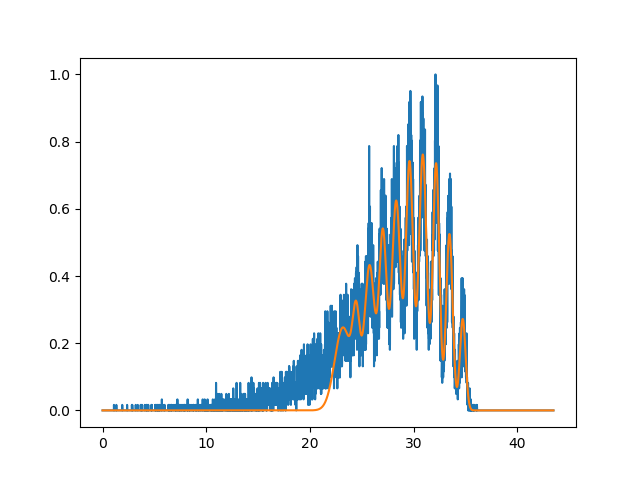

[ 34.74775466  -1.28348803   0.27212717   0.52502818   0.73360734
   0.76048254   0.73422077   0.62273431   0.52286813   0.42997874
   0.24456389   0.24683452   0.27611904   0.31046667   0.31493878
   0.37217373   0.35123942   0.42134439   0.36444836   0.48362241
   0.3470806    0.8       ]
[ 0.00551942  0.00162769  0.0100736   0.00958703  0.00952028  0.00887253
  0.00896688  0.0083229   0.00914869  0.00787095  0.01126109  0.00623629
  0.01217353  0.00712879  0.00558452  0.00656631  0.0069212   0.00980994
  0.0101323   0.01555754  0.01819032  0.03017476]
SiPM GAIN = 2.967328e+06 +- 3.763097e+03 for VDC = 34.000000


In [15]:
param_3400_100  = [34, -1.0, 0.60,0.90,0.9,0.9,0.60,0.90,0.9,0.9,0.60,0.90, 0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10]
# [First mu, D_mu, A0,A1,A2,A3, sigma0,sigma1,sigma2,sigma3]
bounds_3400_100 =([30, -3,   0.0,0,0,0,0,0,0,0,0,0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                  [36, -0.5, 1.0,1,1,1,1,1,1,1,1,1, 0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.8,0.8])


fit_FBK_gain(data_100,2,10,gain_array_100, gainerr_array_100, bounds_3400_100, param_3400_100, voltages_array_100,spe_array_100,speres_array_100)

`ftol` termination condition is satisfied.
Function evaluations 61, initial cost 7.9866e+01, final cost 1.3862e+01, first-order optimality 8.62e-03.


<IPython.core.display.Javascript object>


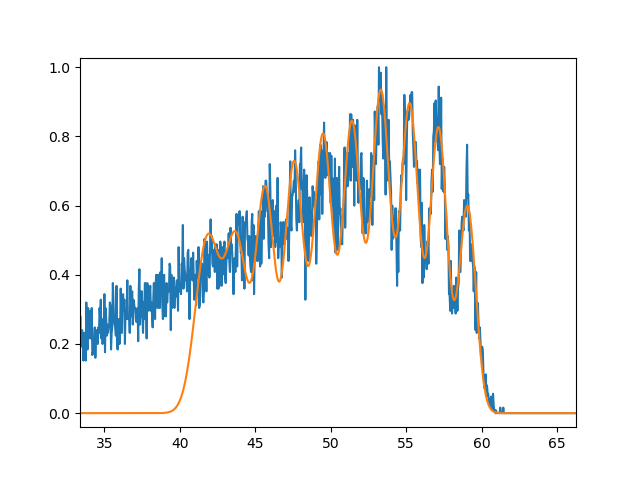

[ 59.06070202  -1.91416699   0.59699761   0.82031477   0.88821999
   0.92470993   0.83498858   0.7992686    0.72077858   0.63891721
   0.49048193   0.50297405   0.55318427   0.57007736   0.6          0.6
   0.6          0.6          0.6          0.6          0.716871     0.8       ]
[ 0.02682356  0.00675336  0.0318739   0.03148977  0.03076994  0.03078794
  0.03078627  0.03077061  0.03077148  0.03201408  0.03349784  0.02985903
  0.04214639  0.03597921  0.0370764   0.03716795  0.04232383  0.04411822
  0.04914533  0.05189667  0.06999755  0.06245715]
SiPM GAIN = 4.425410e+06 +- 1.561326e+04 for VDC = 35.000000


In [18]:
param_3500_100  = [58, -1.0, 0.60,0.90,0.9,0.9,0.60,0.90,0.9,0.9,0.60,0.90, 0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10]
# [First mu, D_mu, A0,A1,A2,A3, sigma0,sigma1,sigma2,sigma3]
bounds_3500_100 =([55, -3,   0.0,0,0,0,0,0,0,0,0,0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                  [60, -0.5, 1.0,1,1,1,1,1,1,1,1,1, 0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.8,0.8])


fit_FBK_gain(data_100,3,10,gain_array_100, gainerr_array_100, bounds_3500_100, param_3500_100, voltages_array_100,spe_array_100,speres_array_100)

`ftol` termination condition is satisfied.
Function evaluations 86, initial cost 8.8532e+01, final cost 2.4620e+01, first-order optimality 1.45e-02.


<IPython.core.display.Javascript object>


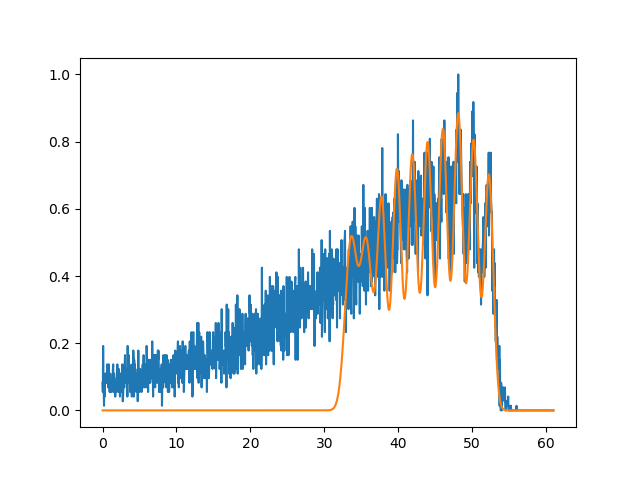

[ 52.26289913  -2.07231839   0.70055987   0.80130066   0.88042625
   0.83377814   0.79486769   0.75918884   0.71604923   0.61661193
   0.49451618   0.49962176   0.6          0.6          0.6          0.6
   0.6          0.6          0.6          0.6          0.79999962   0.8       ]
[ 0.03405262  0.00844569  0.0430833   0.04328005  0.04332416  0.04340639
  0.04339695  0.0433917   0.04346941  0.04467674  0.04173091  0.0417521
  0.05136075  0.05086358  0.04790253  0.05192453  0.05467824  0.05741969
  0.06156322  0.06886111  0.10286247  0.08316176]
SiPM GAIN = 4.791045e+06 +- 1.952579e+04 for VDC = 36.000000


In [20]:
param_3600_100  = [52, -1.0, 0.60,0.90,0.9,0.9,0.60,0.90,0.9,0.9,0.60,0.90, 0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10]
# [First mu, D_mu, A0,A1,A2,A3, sigma0,sigma1,sigma2,sigma3]
bounds_3600_100 =([50, -3,   0.0,0,0,0,0,0,0,0,0,0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                  [55, -0.5, 1.0,1,1,1,1,1,1,1,1,1, 0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.8,0.8])


fit_FBK_gain(data_100,4,10,gain_array_100, gainerr_array_100, bounds_3600_100, param_3600_100, voltages_array_100,spe_array_100,speres_array_100)

`ftol` termination condition is satisfied.
Function evaluations 18, initial cost 6.6435e+01, final cost 5.7155e+00, first-order optimality 7.48e-04.


<IPython.core.display.Javascript object>


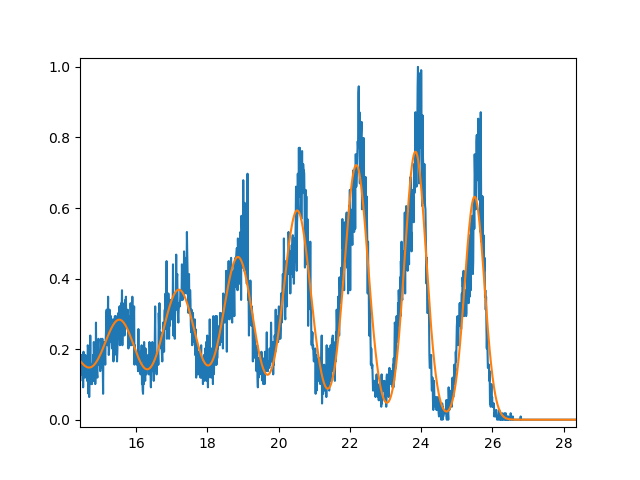

[ 25.49739899  -1.65833213   0.63187264   0.75951971   0.72159621
   0.59292822   0.46025825   0.36767398   0.27750286   0.22533214
   0.14700484   0.13650848   0.27747829   0.30178317   0.33164141
   0.38345801   0.42734994   0.48173842   0.47755428   0.59999849
   0.4684928    0.79999999]
[ 0.00387488  0.00180765  0.01043726  0.01001378  0.00957914  0.00897295
  0.00853732  0.00808813  0.00815725  0.00729943  0.00950114  0.0064023
  0.00529419  0.00460592  0.00517473  0.00722549  0.0110126   0.01637604
  0.02210832  0.0333293   0.03740547  0.05411579]
SiPM GAIN = 3.833939e+06 +- 4.179140e+03 for VDC = 34.250000


In [9]:
param_3425_100  = [25.5, -1.7, 0.60,0.90,0.9,0.9,0.60,0.90,0.9,0.9,0.60,0.90, 0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10]
# [First mu, D_mu, A0,A1,A2,A3, sigma0,sigma1,sigma2,sigma3]
bounds_3425_100 =([25, -3,   0.0,0,0,0,0,0,0,0,0,0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                  [26, -0.5, 1.0,1,1,1,1,1,1,1,1,1, 0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.8,0.8])


fit_FBK_gain(data_100,5,10,gain_array_100, gainerr_array_100, bounds_3425_100, param_3425_100, voltages_array_100,spe_array_100,speres_array_100)

`ftol` termination condition is satisfied.
Function evaluations 20, initial cost 4.9547e+01, final cost 2.8357e+00, first-order optimality 1.47e-03.


<IPython.core.display.Javascript object>


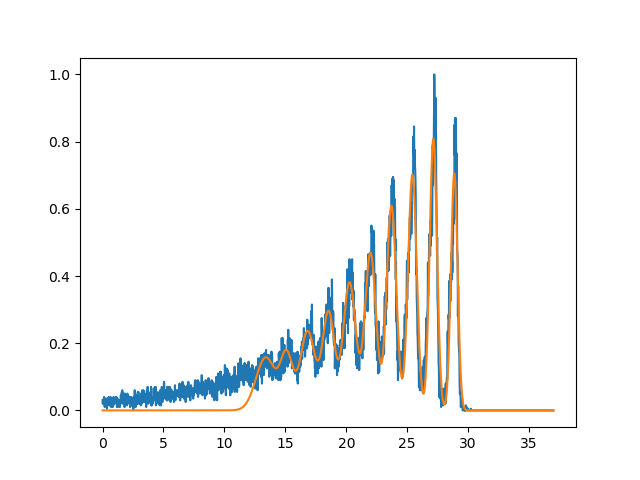

[ 28.86189391  -1.71896335   0.70567317   0.80830921   0.70176182
   0.60852763   0.46835869   0.38064931   0.2917621    0.23566167
   0.16022559   0.15759299   0.27376641   0.30346904   0.35586224
   0.39811712   0.45581828   0.50680988   0.49232713   0.59999775
   0.50181089   0.8       ]
[ 0.00467044  0.00226957  0.01376382  0.01308047  0.01212283  0.01154192
  0.0108312   0.01032595  0.01042914  0.00952313  0.01184514  0.00839545
  0.00616649  0.00568498  0.00725592  0.00951992  0.01494337  0.021648
  0.02844536  0.04156567  0.04723867  0.06093022]
SiPM GAIN = 3.974114e+06 +- 5.247086e+03 for VDC = 34.500000


In [10]:
param_3450_100  = [28, -1.5, 0.60,0.90,0.9,0.9,0.60,0.90,0.9,0.9,0.60,0.90, 0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10]
# [First mu, D_mu, A0,A1,A2,A3, sigma0,sigma1,sigma2,sigma3]
bounds_3450_100 =([27, -3,   0.0,0,0,0,0,0,0,0,0,0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                  [30, -0.5, 1.0,1,1,1,1,1,1,1,1,1, 0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.8,0.8])


fit_FBK_gain(data_100,6,10,gain_array_100, gainerr_array_100, bounds_3450_100, param_3450_100, voltages_array_100,spe_array_100,speres_array_100)

`ftol` termination condition is satisfied.
Function evaluations 23, initial cost 8.6152e+01, final cost 6.8217e+00, first-order optimality 1.35e-03.


<IPython.core.display.Javascript object>


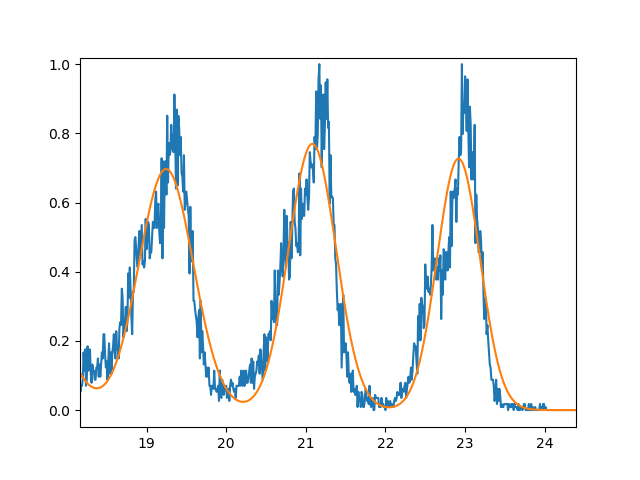

[ 22.91778949  -1.83593245   0.72680282   0.76949582   0.69687682
   0.55539903   0.43347834   0.35993108   0.27630287   0.23766923
   0.17830707   0.16913539   0.26924292   0.29771313   0.34193876
   0.41174032   0.47023538   0.52180792   0.55691223   0.59999911
   0.54981982   0.8       ]
[ 0.00418765  0.00209018  0.01260044  0.0119839   0.01119973  0.01027449
  0.00968564  0.00919951  0.00887968  0.00858231  0.00984773  0.00758849
  0.00538998  0.00535549  0.00639789  0.00933562  0.01438873  0.02050858
  0.0293637   0.03655479  0.04130999  0.05064228]
SiPM GAIN = 4.244538e+06 +- 4.832343e+03 for VDC = 35.000000


In [11]:
param_3500_100  = [23, -1.6,     0.60,0.90,0.9,0.9,0.60,0.6,0.6,0.6,0.6,0.6,   0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10]
# [First mu, D_mu, A0,A1,A2,A3, sigma0,sigma1,sigma2,sigma3]
bounds_3500_100 =([22.5, -3.0,   0,0,0,0,0,0,0,0,0,0,          0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                  [25.0, 0,      1,1,1,1,1,1,1,1,1,1,          0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.8,0.8])

fit_FBK_gain(data_100,7,10,gain_array_100, gainerr_array_100, bounds_3500_100, param_3500_100,voltages_array_100,spe_array_100,speres_array_100)

`ftol` termination condition is satisfied.
Function evaluations 20, initial cost 5.4938e+01, final cost 5.0937e+00, first-order optimality 5.34e-04.


<IPython.core.display.Javascript object>


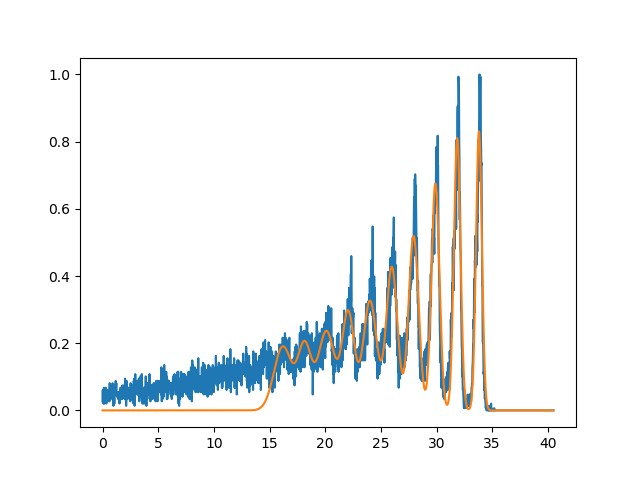

[ 33.81068068  -1.95699595   0.83089691   0.81099531   0.67527102
   0.51910215   0.42587823   0.32612613   0.29068185   0.23549584
   0.19151408   0.19001959   0.26440423   0.29578333   0.3584558
   0.44953523   0.49789529   0.59991205   0.54630311   0.72521366
   0.5994642    0.8       ]
[ 0.00537141  0.00300669  0.0179411   0.01696332  0.01543423  0.01388904
  0.01322369  0.01221495  0.01286401  0.01121065  0.01362303  0.01063852
  0.00659235  0.00714471  0.00954438  0.01483126  0.02161092  0.03557393
  0.03859607  0.06175557  0.05684243  0.06385679]
SiPM GAIN = 4.524428e+06 +- 6.951246e+03 for VDC = 35.500000


In [12]:
param_3550_100  = [33, -1.8, 0.60,0.90,0.9,0.9,0.60,0.90,0.9,0.9,0.9,0.9, 0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3550_100 =([30, -3,   0.0,0,0,0,0,0,0,0,0,0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                  [35,  0.0, 1.0,1,1,1,1,1,1,1,1,1, 0.3,0.3,0.6,0.6,0.6,0.6,0.6,0.8,0.8,0.8])

fit_FBK_gain(data_100,8,10,gain_array_100, gainerr_array_100, bounds_3550_100, param_3550_100,voltages_array_100,spe_array_100,speres_array_100)

`ftol` termination condition is satisfied.
Function evaluations 22, initial cost 1.5391e+01, final cost 5.1426e-01, first-order optimality 1.10e-04.


<IPython.core.display.Javascript object>


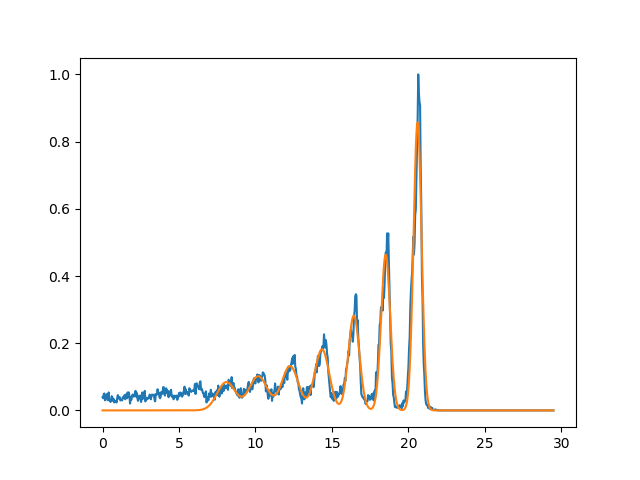

[ 20.59473677  -2.08306982   0.85720616   0.46384009   0.28202151
   0.1817502    0.13170881   0.10142803   0.08421123   0.26194055
   0.2952469    0.36169538   0.47326755   0.54966846   0.59999999
   0.59999998]
[ 0.00452607  0.00517795  0.01342034  0.01264082  0.01143297  0.01006157
  0.00940148  0.00899658  0.00892203  0.00473533  0.00929117  0.01702656
  0.03231717  0.0534923   0.0764434   0.08364339]
SiPM GAIN = 4.815901e+06 +- 1.197102e+04 for VDC = 36.000000


In [13]:
param_3600_100  = [21, -1.8, 0.60,0.90,0.9,0.9,0.60,0.90,0.9, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
# [First mu, D_mu, A0,A1,A2,A3, sigma0,sigma1,sigma2,sigma3]
bounds_3600_100 =([20, -3,   0.0,0,0,0,0,0,0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                  [22,  0.0, 1.0,1,1,1,1,1,1, 0.4,0.4,0.6,0.6,0.6,0.6,0.6])

fit_FBK_gain(data_100,9,7,gain_array_100, gainerr_array_100, bounds_3600_100, param_3600_100,voltages_array_100,spe_array_100,speres_array_100)

`ftol` termination condition is satisfied.
Function evaluations 25, initial cost 2.1300e+01, final cost 2.3033e+00, first-order optimality 3.71e-04.


<IPython.core.display.Javascript object>


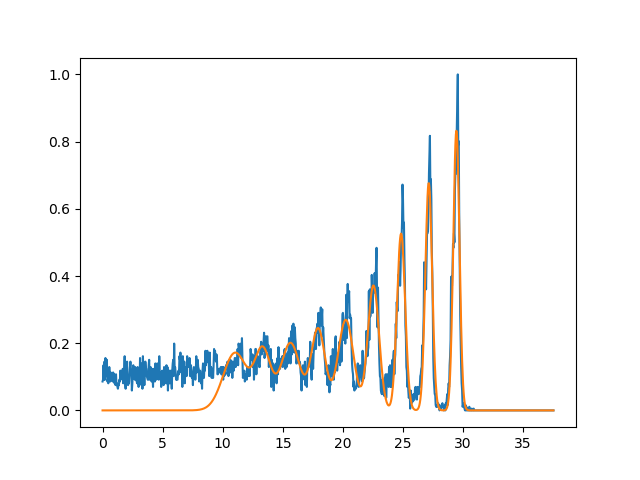

[ 29.4422316   -2.30042433   0.83217533   0.67751923   0.52618864
   0.37162771   0.2695143    0.24145446   0.2007752    0.17499074
   0.17171212   0.25710758   0.28333991   0.33964992   0.46833086
   0.64668852   0.5865242    0.7999907    0.66318401   1.        ]
[ 0.0079651   0.00557815  0.02541476  0.02420971  0.0221144   0.01890326
  0.01639023  0.01698201  0.01481262  0.01775184  0.01329198  0.00906683
  0.01169082  0.01649032  0.02904123  0.05336027  0.06142012  0.09674348
  0.08842404  0.11124472]
SiPM GAIN = 5.318408e+06 +- 1.289626e+04 for VDC = 37.000000


In [14]:
param_3700_100  = [29, -1.8, 0.90,0.90,0.9,0.9,0.90,0.9,0.90,0.9,0.90, 0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10]
# [First mu, D_mu, A0,A1,A2,A3, sigma0,sigma1,sigma2,sigma3]
bounds_3700_100 =([27, -3,   0,0,0,0,0,0,0,0,0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                  [30,  0.0, 1,1,1,1,1,1,1,1,1, 0.4,0.4,0.6,0.8,0.8,0.8,0.8,0.8,1.0])

fit_FBK_gain(data_100,10,9,gain_array_100, gainerr_array_100, bounds_3700_100, param_3700_100,voltages_array_100,spe_array_100,speres_array_100)

Max Linearity Error = 0.593%


<IPython.core.display.Javascript object>


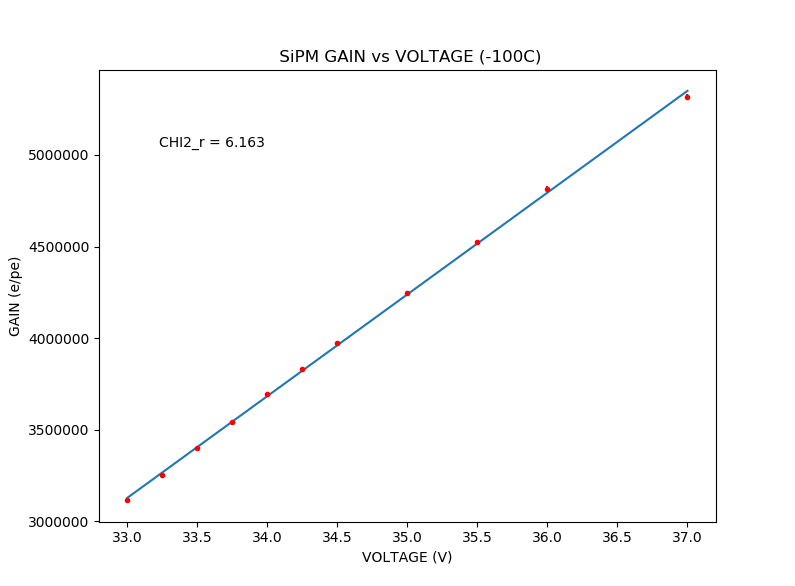

In [15]:
gain_array_100 = -1*gain_array_100 
coeff_lin_100, perr_lin_100, XI2_r_100 = fit_library_n.line_fit(gain_array_100,voltages_array_100,gainerr_array_100,'','','',1,0)
plt.figure()
plt.xlabel("VOLTAGE (V)")
plt.ylabel("GAIN (e/pe)")
plt.title(" SiPM GAIN vs VOLTAGE (-100C)")
plt.figtext(0.2,0.75, ('CHI2_r = %0.3f ' % (XI2_r_100)))
plt.errorbar(voltages_array_100,gain_array_100,fmt='r.',yerr=gainerr_array_100)
plt.plot(voltages_array_100,fit_library_n.line(voltages_array_100,coeff_lin_100[0],coeff_lin_100[1]))

plt.figure()
plt.xlabel("VOLTAGE (V)")
plt.ylabel("DARK COUNT (cps)")
plt.title(" DARK COUNT vs VOLTAGE (-110C)")
x = np.array([33.25,33.75,34.00,34.25,34.5])
y = np.array([0.5, 1.3, 2.16, 2.92, 3.65])
plt.plot(x,y,'b.-')

Max Linearity Error = 0.593%


<IPython.core.display.Javascript object>


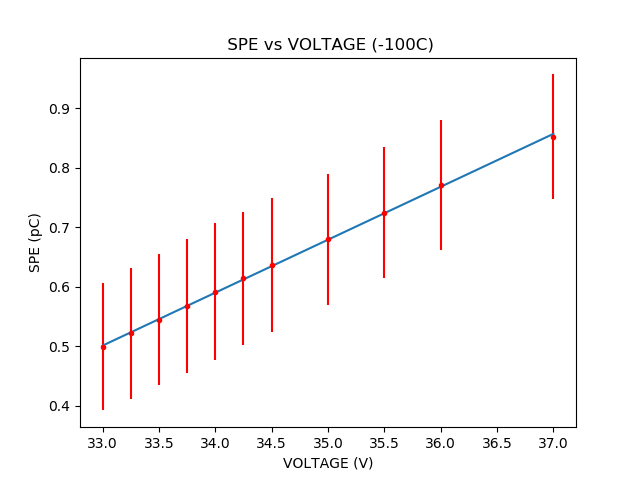

In [16]:
coeff_spe_100, perr_spe_100, XI2_spe_100 = fit_library_n.line_fit(-1*spe_array_100,voltages_array_100,gainerr_array_100,'','','',1,0)
plt.figure()
plt.xlabel("VOLTAGE (V)")
plt.ylabel("SPE (pC)")
plt.title(" SPE vs VOLTAGE (-100C)")
#plt.figtext(0.2,0.75, ('CHI2_r = %0.3f ' % (XI2_spe_110)))
plt.errorbar(voltages_array_100,-1*spe_array_100,fmt='r.',yerr=speres_array_100)
plt.plot(voltages_array_100,fit_library_n.line(voltages_array_100,coeff_spe_100[0],coeff_spe_100[1]))

<IPython.core.display.Javascript object>


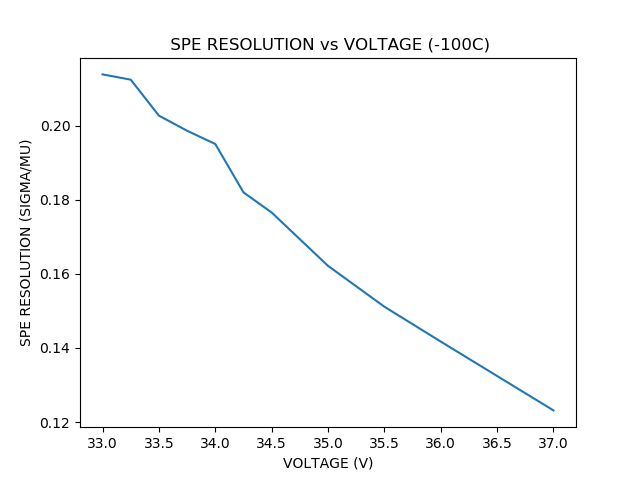

In [17]:
plt.figure()
plt.xlabel("VOLTAGE (V)")
plt.ylabel("SPE RESOLUTION (SIGMA/MU)")
plt.title(" SPE RESOLUTION vs VOLTAGE (-100C)")
plt.plot(voltages_array_100,speres_array_100/(-1*spe_array_100))